# Analysis of the characteristics and prognosis of the patients undergoing per cutaneous coronary intervention

### Intro to Data Science (COMP 5360), U of U

#### Video for Final submission: https://youtu.be/lDkcSUcyIio
#### Names: Mazen Salama , Wonkyung Lee
#### Emails: mazen.salama@utah.edu, u1214948@utah.edu
#### UIDs: u1074476, u1214948

## Backgrounds and Motivation
Cardiovascular disease is the cause of deaths in 17.9 million people every year and consist of 31%of all global deaths. Coronary artery disease has well-determined risk factors that include high blood pressure, smoking, diabetes, lack of exercise, obesity, high blood cholesterol, poor diet, depression, family history, and excessive alcohol. However, we could not define one persona for the high-risk group of cardiovascular disease. For example, there are many non-smokers who got myocardial infarction (MI) even though smoking is one of the most contributing factors in MI. Moreover, cardiovascular disease differs depending on sex. Cardiovascular disease develops 7 to 10 years later in women than in men and people frequently underestimate the risk of MI among women due to the misperception that females are ‘protected’ against Coronary artery disease (CAD). Therefore, evaluating the characteristics of the patients and grouping them into some cluster could deepen our understanding of the high-risk group of MI.  

CAD, known as ischemic heart disease (IHD), includes the reduction of blood flow to the heart muscle due to the formation of a plaque or atheroma in the arteries of the heart. For the treatment of MI, Percutaneous Coronary Intervention (PCI) is used as a non-surgical procedure that uses a catheter to place a stent to open up blood vessels in the heart. Decreased heart function after CAD could result in heart failure with the symptoms of Dyspnea, fatigue, and exercise intolerance which interferes with daily life and lower quality of life among the patients with CAD. Therefore, predicting the heart function could be important for the prognosis and treatment including lifestyle modification of the patient. 

## Objectives
(1) we’d like to evaluate the characteristics of the patients undergoing PCI and we could group them who have similarities to get an insight of different phenotypes (personas)  
(2) we aim to predict the cardiac function of the patients using multiple attributes before PCI. It could help us to predict the prognosis of the patient with myocardial infarction and how many patients are going to need treatments for heart failure.

## Data
Dataset is de-identified 257 cardiac patients who did PCI in Middle East area from beginning  2013 to end of 2014. Who already approved by consent to share their data for research.

In [246]:
#Exploratory analysis in Python using Pandas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [247]:
# Read the dataset in a dataframe using Pandas
df = pd.read_csv("updated_data.csv") 
#Importing data with specific columns
df = df[["Age", "Sex", "DM", "Hypertension","Dyslipidemia", "Smoking", "CAD", "CRF", "BMI", "PreEF", "Vessles", "PostEF"]]
df.head()

,Age,Sex,DM,Hypertension,Dyslipidemia,Smoking,CAD,CRF,BMI,PreEF,Vessles,PostEF
0,48.0,Male,0.0,0,0,1,0,0,26.0,NaN,MVD,35.0
1,71.0,Male,0.0,1,0,0,0,0,28.0,30.0,SVD,30.0
2,50.0,Male,1.0,1,0,1,0,0,28.0,50.0,SVD,45.0
3,76.0,Female,1.0,1,0,0,0,1,29.0,40.0,SVD,35.0
4,48.0,Male,1.0,1,0,1,0,0,28.0,NaN,MVD,30.0


In [248]:
# count misssing values every column 
df.isna().sum()  

Age               3
Sex               0
DM               15
Hypertension      0
Dyslipidemia      0
Smoking           0
CAD               0
CRF               0
BMI             116
PreEF           186
Vessles           0
PostEF           59
dtype: int64

In [249]:
# Check for Shape and data type
df=df.dropna() # remove rows that have any missing values
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 752 entries, 1 to 1081
Data columns (total 12 columns):
Age             752 non-null float64
Sex             752 non-null object
DM              752 non-null float64
Hypertension    752 non-null int64
Dyslipidemia    752 non-null int64
Smoking         752 non-null int64
CAD             752 non-null int64
CRF             752 non-null int64
BMI             752 non-null float64
PreEF           752 non-null float64
Vessles         752 non-null object
PostEF          752 non-null float64
dtypes: float64(5), int64(5), object(2)
memory usage: 76.4+ KB


In [250]:
# Descriptive Analysis
df.describe()

,Age,DM,Hypertension,Dyslipidemia,Smoking,CAD,CRF,BMI,PreEF,PostEF
count,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000
mean,58.335106,0.422872,0.481383,0.368351,0.647606,0.464096,0.009309,29.884309,40.365691,38.267287
std,12.902355,0.494344,0.499986,0.482678,0.478034,0.499041,0.096094,7.670037,6.988142,6.045244
min,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,20.000000,15.000000
25%,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,35.000000,35.000000
50%,58.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,28.000000,40.000000,35.000000
75%,70.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,30.250000,45.000000,40.000000
max,85.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,55.000000,60.000000,55.000000


<function matplotlib.pyplot.show(*args, **kw)>

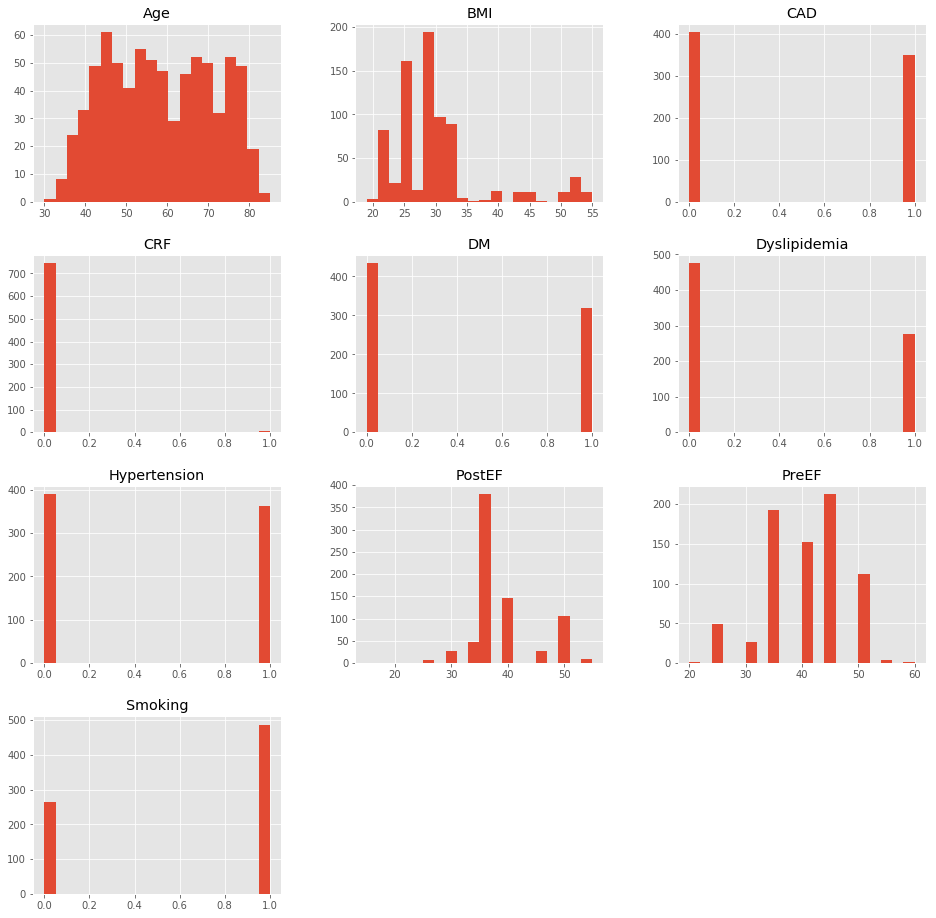

In [251]:
#Distribution analysis: to explore attributes by plotting the histogram
import matplotlib.pyplot as plt
%matplotlib inline
df.hist(bins=20, figsize= (16,16))
plt.show

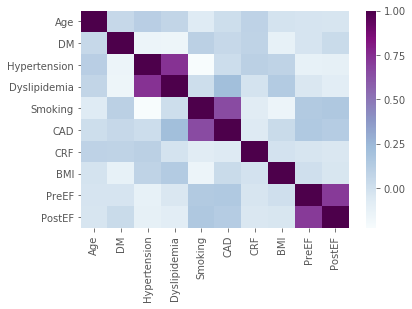

In [252]:
#we check the correlation between all variables using the code below.
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap="BuPu")

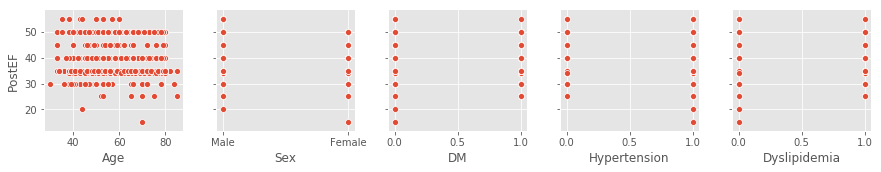

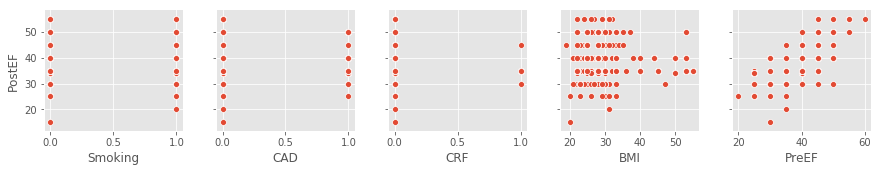

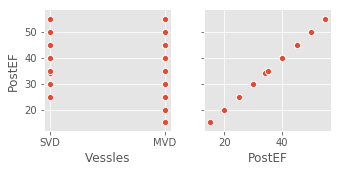

In [253]:
# Now, we xplore which features are strongly correlated with Post Cath EF which we are insterested in. 
# All variables
for i in range(0, len(df.columns), 5):
    sns.pairplot(data=df,
                x_vars=df.columns[i:i+5],
                y_vars=['PostEF'])

In [254]:
# Continuous variables
#Correlation to find which continuous variables are strongly correlated with Post Cath EF. 
df_num_corr = df[['Age','BMI','PreEF','PostEF']].corr()['PostEF'][:-1]
print('correlation coefficient with PostEF: ')
print(df_num_corr)
print('======================')
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with PostEF:\n{}".format(len(golden_features_list), golden_features_list))

correlation coefficient with PostEF: 
Age     -0.024504
BMI     -0.031869
PreEF    0.715391
Name: PostEF, dtype: float64
There is 1 strongly correlated values with PostEF:
PreEF    0.715391
Name: PostEF, dtype: float64


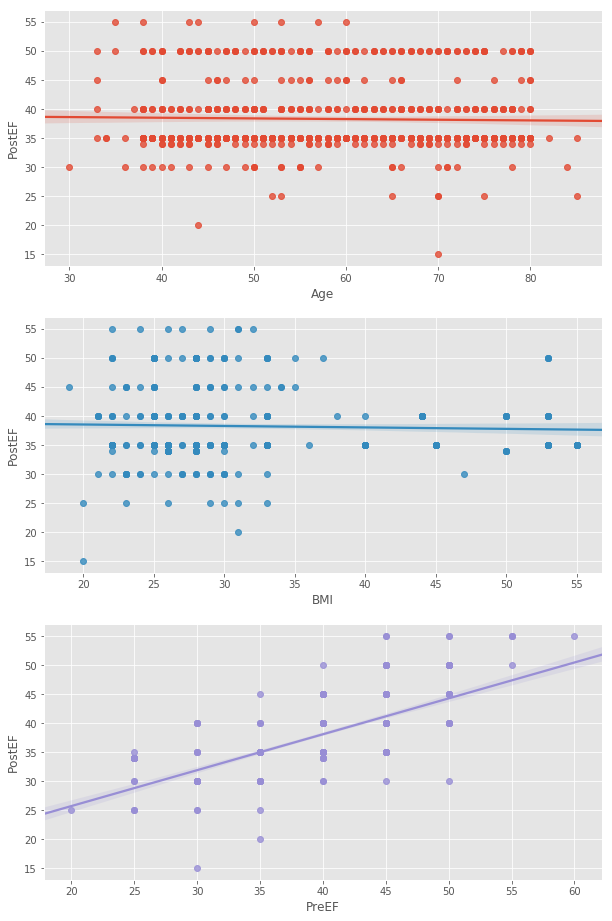

In [255]:
# scatter plot with regression line
features_to_analyse=['Age','BMI','PreEF', 'PostEF']
fig, ax = plt.subplots(3, 1, figsize = (10, 16))
for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y='PostEF', data=df[features_to_analyse], ax=ax)

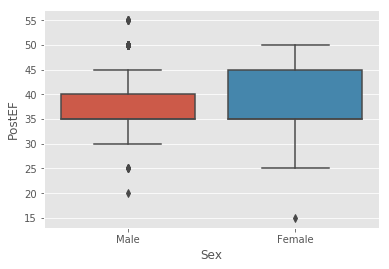

In [256]:
# categorical variables 
plt.figure(figsize = (6, 4))
sns.boxplot(x='Sex', y='PostEF', data=df)

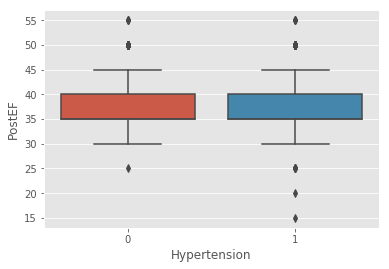

In [257]:
sns.boxplot(x='Hypertension', y='PostEF', data=df)

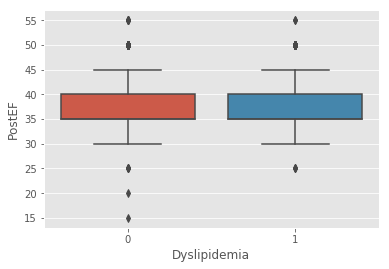

In [258]:
sns.boxplot(x='Dyslipidemia', y='PostEF', data=df)

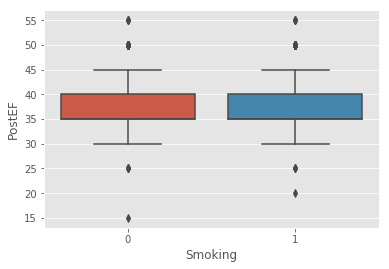

In [259]:
sns.boxplot(x='Smoking', y='PostEF', data=df)

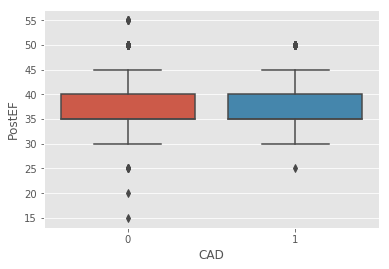

In [260]:
sns.boxplot(x='CAD', y='PostEF', data=df)

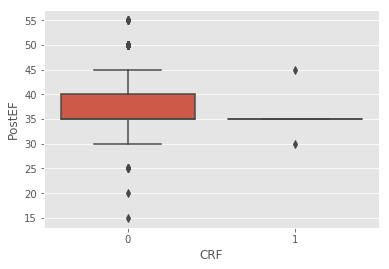

In [261]:
sns.boxplot(x='CRF', y='PostEF', data=df)

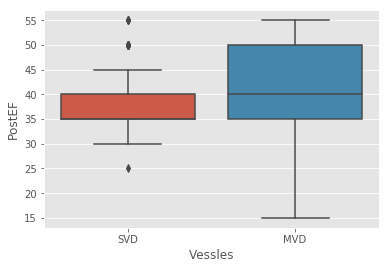

In [262]:
sns.boxplot(x='Vessles', y='PostEF', data=df)

## Analysis Methodology

For clustering, we would consider K-means, Hierarchical clustering and evaluate its clustering. For building a Predictive Model, we may use Linear Regression for a continuous outcome variable, Decision Tree and Random Forest for categorical outcome variable. We are going to test it using K-fold validation or bootstrapping depending on the final sample size.
We consider using Scikit Learn which was developed for machine learning built on NumPy, SciPy, and matplotlib and contains a lot of efficient tools for machine learning and statistical modeling including classification, regression, clustering, and dimensionality reduction. But we also think about using Stats models for statistical modeling to explore data, estimate statistical models, and perform statistical tests. 

### Clustering

In [263]:
# import modules
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
# Create color maps
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#e41a1c","#984ea3","#a65628","#377eb8","#ffff33","#4daf4a","#ff7f00"])
from sklearn.metrics import homogeneity_score, homogeneity_completeness_v_measure
color_array = ["#984ea3","#a65628","#ffff33","#4daf4a","#ff7f00", "#e41a1c", "#377eb8"]
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

In [264]:
## chagen features from character to integer
df['Sex'] = np.where(df['Sex'] == 'Male', 1, 0)
df['Vessles'] = np.where(df['Vessles'] == 'MVD', 1, 0)

print(df['Sex'].value_counts())
print(df['Vessles'].value_counts())     

1    484
0    268
Name: Sex, dtype: int64
0    505
1    247
Name: Vessles, dtype: int64


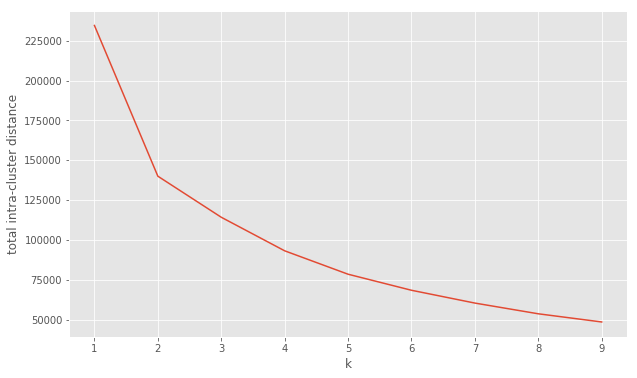

In [265]:
# clustering for k = 1 to k = 10
ks = range(1,10)
scores = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit_predict(df)
    scores.append(-model.score(df))

plt.plot(ks, scores)
plt.ylabel('total intra-cluster distance')
plt.xlabel('k')
plt.show()

In [266]:
kmodel = KMeans(n_clusters=2,n_init=100).fit_predict(df)

For n_clusters = 2 The silhouette_score is : 0.35726113756099226


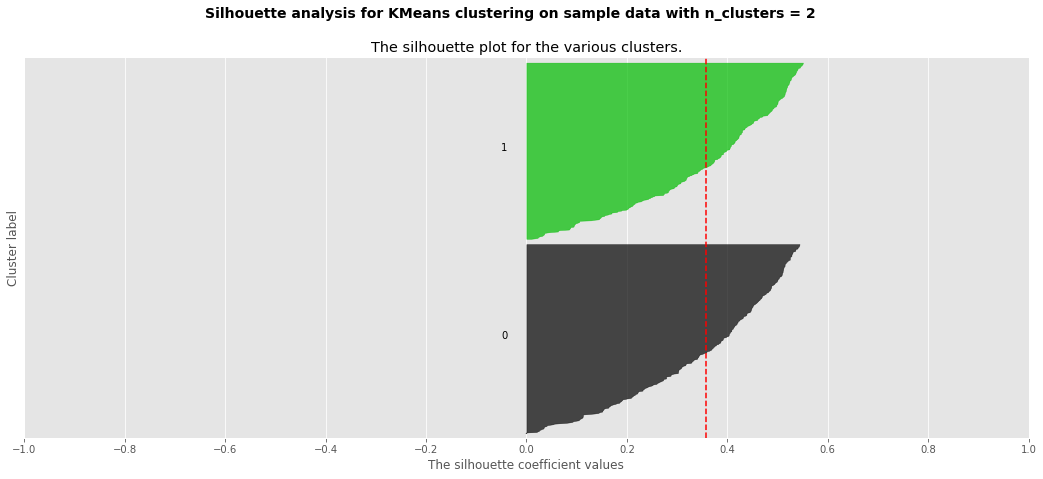

For n_clusters = 3 The silhouette_score is : 0.3754886087379425


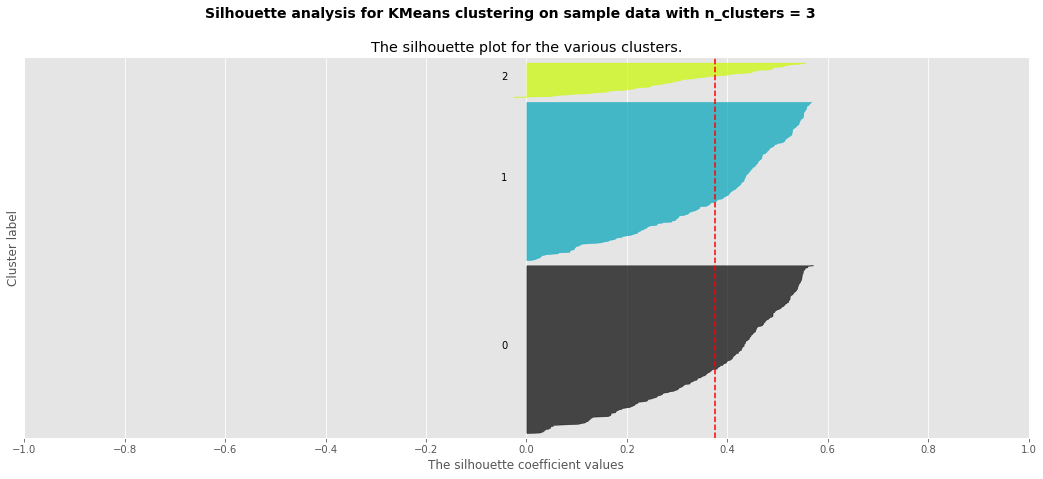

For n_clusters = 4 The silhouette_score is : 0.34415937297870497


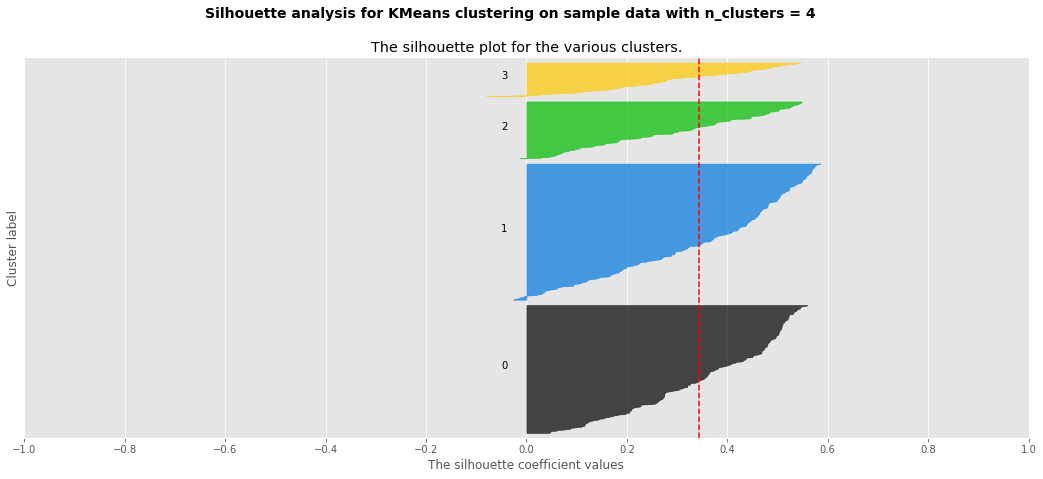

In [267]:
# Silhouette Analysis
range_n_clusters = [2, 3, 4]

for n_clusters in range_n_clusters:
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette coefficient of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [268]:
df2 = df.assign(kc = kmodel)

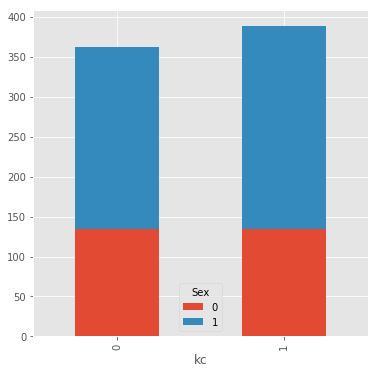

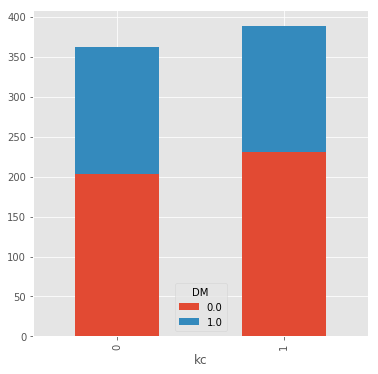

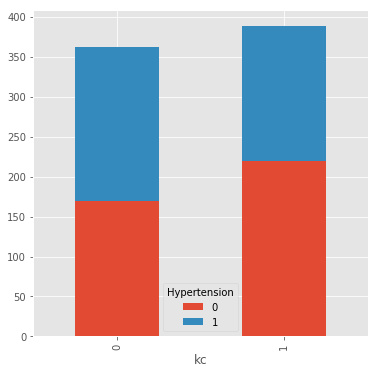

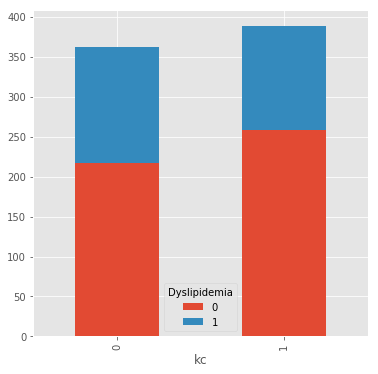

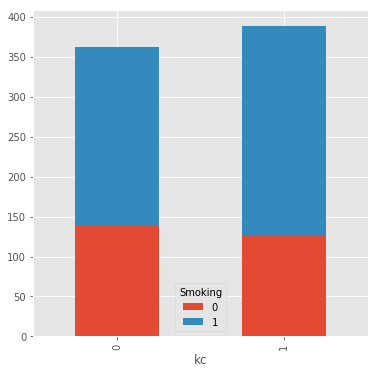

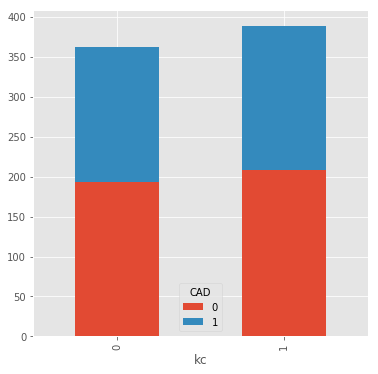

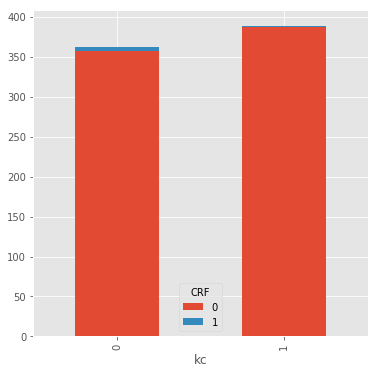

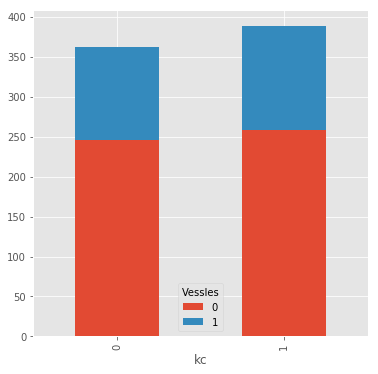

In [269]:
cat_features = ["Sex","DM", "Hypertension","Dyslipidemia", "Smoking", "CAD", "CRF","Vessles"]
for i in cat_features:
    cluster_table = pd.crosstab(index=df2["kc"], 
                          columns=df2[i])
    cluster_table.plot(kind="bar", 
                 figsize=(6,6),
                 stacked=True)

In [270]:
for i in cat_features:
    cluster_table = pd.crosstab(index=df2["kc"], 
                          columns=df2[i], normalize='index').round(3)*100
    print(cluster_table)

Sex     0     1
kc             
0    36.9  63.1
1    34.4  65.6
DM   0.0   1.0
kc            
0   55.9  44.1
1   59.4  40.6
Hypertension     0     1
kc                      
0             46.8  53.2
1             56.6  43.4
Dyslipidemia     0     1
kc                      
0             59.8  40.2
1             66.3  33.7
Smoking     0     1
kc                 
0        38.0  62.0
1        32.6  67.4
CAD     0     1
kc             
0    53.4  46.6
1    53.7  46.3
CRF     0    1
kc            
0    98.3  1.7
1    99.7  0.3
Vessles     0     1
kc                 
0        67.8  32.2
1        66.6  33.4


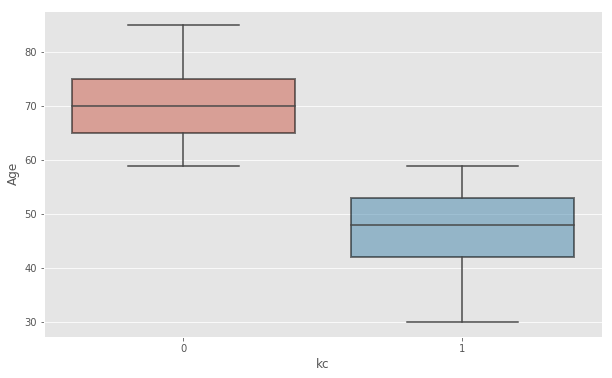

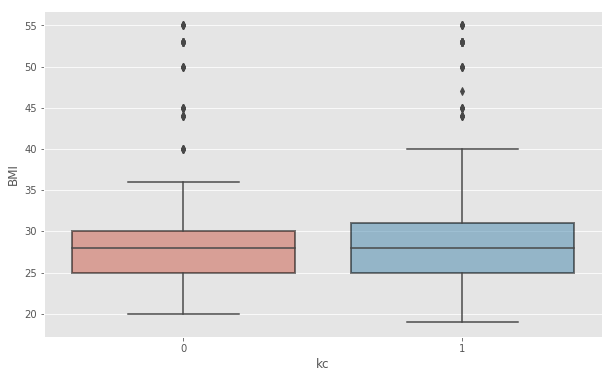

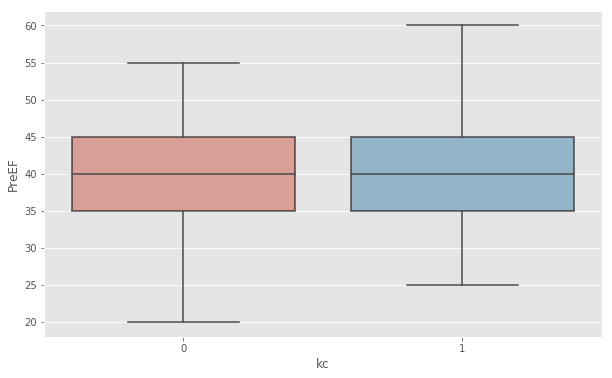

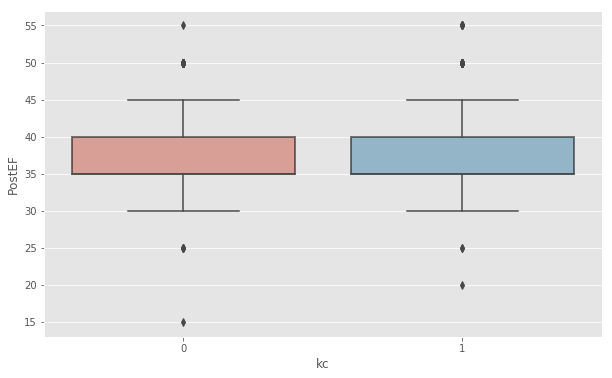

In [271]:
con_features = ["Age","BMI","PreEF","PostEF"]
for i in con_features:
    plt.figure(figsize = (10, 6))
    ax = sns.boxplot(x='kc', y= i, data=df2)
    plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")

### Hierachical clustering

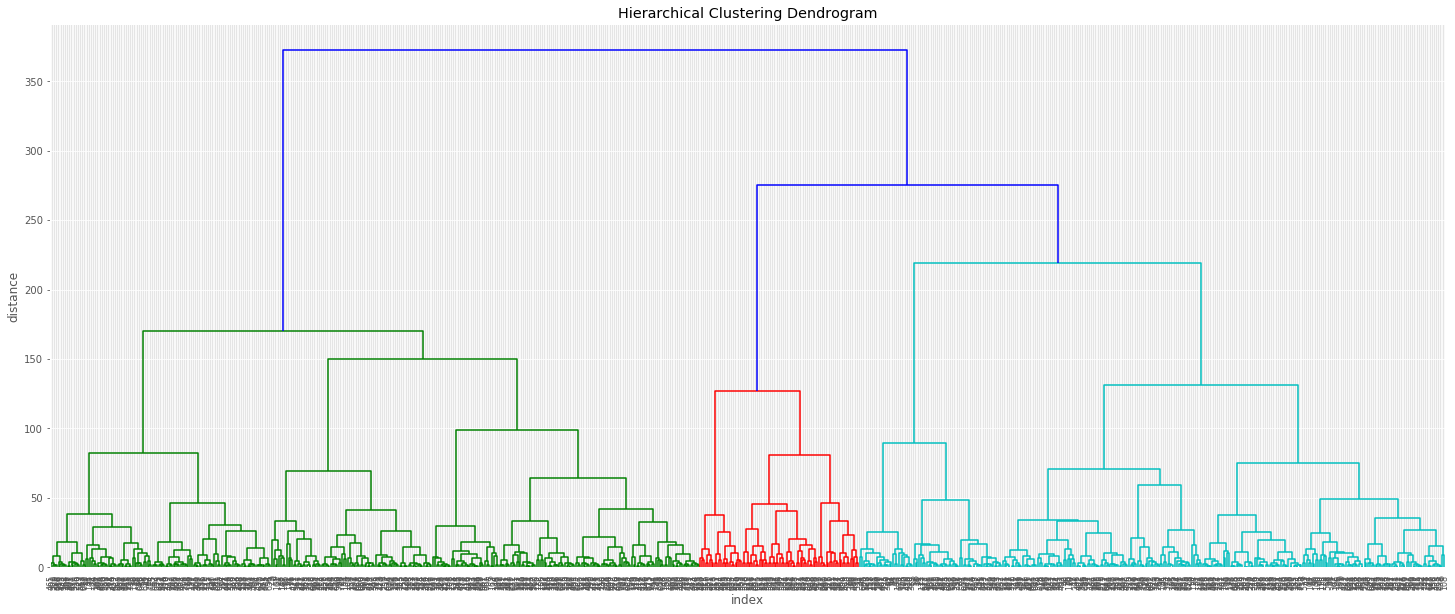

In [272]:
# Hierachical clustering
Z = linkage(df, 'ward') # generate the linkage array
# dendrogram plot
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
dendrogram(Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8. # font size for the x axis labels
)
plt.show()

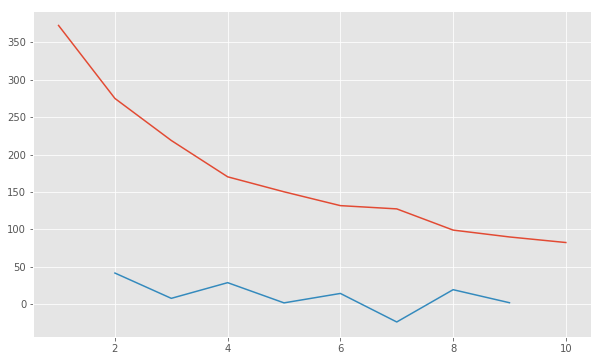

The best number of clusters: 2


In [273]:
# Elbow method
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print("The best number of clusters:", k)

In [274]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
df3 = df2.assign(hc = cluster.fit_predict(df)) 
homogeneity_completeness_v_measure(labels_true = df3['kc'], labels_pred = df3['hc'])

(0.38923831687900984, 0.3902497273123303, 0.38974336592712955)

In [275]:
models = [AgglomerativeClustering(linkage="ward", affinity='euclidean', n_clusters=2), 
         AgglomerativeClustering(linkage="average", affinity='euclidean', n_clusters=2), 
         AgglomerativeClustering(linkage="complete", affinity='euclidean', n_clusters=2), 
         AgglomerativeClustering(linkage="average", affinity='manhattan', n_clusters=2),
         AgglomerativeClustering(linkage="complete", affinity='manhattan', n_clusters=2)]
h = np.zeros([len(models),3])
for i,m in enumerate(models):
    y_pred = m.fit_predict(df3)
    h[i,:] = homogeneity_completeness_v_measure(labels_true = df2['kc'], labels_pred = y_pred)
    print(h[i,:])

print('The most similar model to K-means is model #' + str(np.argmax(h[:,0]))
      + ' with homogeneity score ' + str(np.max(h[:,0])))
print('Method details:')
print(models[np.argmax(h[:,0])])

[0.44710338 0.49771076 0.47105172]
[0.00280248 0.1053313  0.0054597 ]
[0.23520072 0.25505336 0.24472508]
[0.01127651 0.13255729 0.02078487]
[0.45988542 0.45960369 0.45974451]
The most similar model to K-means is model #4 with homogeneity score 0.4598854150149477
Method details:
AgglomerativeClustering(affinity='manhattan', compute_full_tree='auto',
            connectivity=None, linkage='complete', memory=None,
            n_clusters=2, pooling_func='deprecated')


## Interpretation:   
Group 1 is more female and are likely to have diabetes, hypertension, dyslipidemia and chronic renal failure. They are usually older without family history of coronary arterial disease. In coronary angiography, they are prone to have multi-vessel disease.  

In contrast, group 2 is more male-dominant and youger than group 1. They are less likely to have diabetes, hypertension and dyslipidemia. But Group 2 is more likely to have family history of coronary arterial disease. In coronary angiography, they are prone to have single-vessel disease. 

## Prediction Model

In [276]:
# Encoding: Since sklearn requires all inputs to be numeric, we should convert all our categorical variables into numeric by encoding the categories.
from sklearn.preprocessing import LabelEncoder
var_mod = ["Age", "Sex", "DM", "Hypertension","Dyslipidemia", "Smoking", "CAD", "CRF", "BMI", "PreEF", "Vessles", "PostEF"]
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes 

Age             int64
Sex             int64
DM              int64
Hypertension    int64
Dyslipidemia    int64
Smoking         int64
CAD             int64
CRF             int64
BMI             int64
PreEF           int64
Vessles         int64
PostEF          int64
dtype: object

In [277]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

### Classification using Logistic Regression

In [278]:
#Logistic Regression
outcome_var = 'PostEF'
model = LogisticRegression()
#We can try different combination of variables:
predictor_var = ["Age", "Sex", "DM", "Hypertension","Dyslipidemia", "Smoking", "CAD", "CRF", "BMI", "PreEF", "Vessles"]
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 75.399%
Cross-Validation Score : 72.368%


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver 

In [279]:
#Decision Tree
#Decision tree is another method for making a predictive model. It is known to provide higher accuracy 
#than logistic regression model. 

model = DecisionTreeClassifier()
predictor_var = ["DM", "Hypertension","Dyslipidemia", "Smoking", "CAD", "CRF", "PreEF"]
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 83.112%
Cross-Validation Score : 68.358%


In [280]:
#We can try different combination of variables:
predictor_var = ["Age", "Sex", "DM", "Hypertension","Dyslipidemia", "Smoking", "CAD", "CRF", "BMI", "PreEF", "Vessles"]
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 99.867%
Cross-Validation Score : 75.816%


In [281]:
#Let’s try a less variables:
predictor_var = ["Age","Sex","DM", "Hypertension","Dyslipidemia", "Smoking", "CAD", "CRF", "PreEF","Vessles"]
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 98.803%
Cross-Validation Score : 72.223%


### Classification using Random Forest

In [282]:
# Random Forest
#Random forest is another algorithm for solving the classification problem
model = RandomForestClassifier(n_estimators=100)
predictor_var = ["Sex", "Age","Vessles","DM", "Hypertension","Dyslipidemia", "Smoking", "CAD", "CRF", "PreEF"]
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 98.803%
Cross-Validation Score : 72.630%


In [283]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)

PreEF           0.463528
Age             0.224122
Vessles         0.077187
Sex             0.047274
DM              0.040982
Smoking         0.037719
CAD             0.037212
Hypertension    0.034924
Dyslipidemia    0.031939
CRF             0.005113
dtype: float64


In [284]:
#Let’s use the top 5 variables for creating a model. Also, we will modify the parameters of random forest model 
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['Age','PreEF','DM','Vessles','Smoking']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 75.266%
Cross-Validation Score : 71.062%


### Classification using KNN

In [285]:
# X == Features we will be using
x = df.iloc[:,0:11].values
# Target/Labels
y = df['PostEF'].values

In [286]:
#Model Building
#Train ,Test Split
#Using Algorithmns on each
from sklearn.model_selection import train_test_split
# Train Test Data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [287]:
#Loading knearest neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

In [288]:
# Accuracy Scores For 9 k's
test_accuracy

# Accuracy Scores For 9 k's
train_accuracy


array([1.        , 0.85089463, 0.79324056, 0.76143141, 0.74552684,
       0.73161034, 0.70576541, 0.70178926])

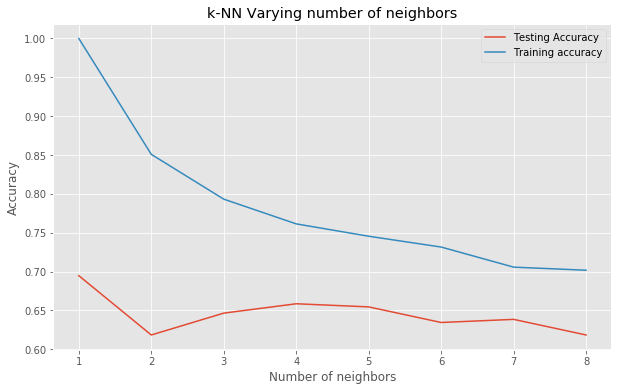

In [289]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [290]:
#Create KNN Classifier Using n = 7
knn = KNeighborsClassifier(n_neighbors=7)

#Train the model using the training sets
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [291]:
#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [292]:
##### Accuracy of Our Prediction
#Using scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6385542168674698


In [293]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,10)}
knn1 = KNeighborsClassifier()
knn_cv= GridSearchCV(knn1,param_grid,cv=5)

# Due to the huge size of the data we will be fitting on a sample
knn_cv.fit(X_train, y_train)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [294]:
# Best Score
knn_cv.best_score_

0.6461232604373758

### Classification using SVM
#Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier.

In [295]:
# Import SVM 
from sklearn.svm import SVC 
# Features
X_svm = x
# Labels or Targets
y_svm = y
# Train Test Data
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_svm, y_svm, test_size=0.33, random_state=42)
# Create SVM classification object 
svm_model = SVC(kernel='linear', gamma=1) 
# Takes time to fit
svm_model.fit(X_train1, y_train1)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [296]:
# Accuracy Score of Training Dataset
svm_model.score(X_train1, y_train1)

0.8290258449304175

In [297]:
# Accuracy Score
svm_model.score(X_test1, y_test1)

0.7188755020080321

In [298]:
#Predict Output
predicted= svm_model.predict(X_test1)

In [299]:
#### Applying the Prediction on Sample Data
# Sample 5 Data Points
sample_svm_X = X_train1[:5]
sample_svm_y = y_train1[:5]

In [300]:
print("Predicted shares:", svm_model.predict(sample_svm_X))
print("Actual shares:", list(sample_svm_y))

Predicted shares: [6 5 5 5 5]
Actual shares: [6, 5, 5, 5, 5]


### Classification using decision trees

In [301]:
# Classification using decision trees
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
# X_train2 to avoid confusion with previous works
# y_train2 
# Train Test Data
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.33, random_state=42)
# Fitting data with model
clf = clf.fit(X_train2, y_train2)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [302]:
### Accuracy on Training and Test data
print('Accuracy on Training data: ', clf.score(X_train2,y_train2))
print('Accuracy on Training data: ', clf.score(X_test2,y_test2))

Accuracy on Training data:  1.0
Accuracy on Training data:  0.8072289156626506


In [303]:
### Cross Validation - Decision Tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
clf_scores = cross_val_score(clf, X_train2, y_train2,
                         scoring="neg_mean_squared_error", cv=10)
#RMSE
clf_rmse_scores = np.sqrt(-clf_scores)
clf_rmse_scores

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


array([0.91452919, 0.99069747, 0.59317101, 1.06518326, 0.73484692,
       0.61237244, 0.45643546, 0.5       , 0.60141677, 0.98930451])

In [304]:
# Let us Display the Root Mean Scores
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(clf_rmse_scores)

Scores: [0.91452919 0.99069747 0.59317101 1.06518326 0.73484692 0.61237244
 0.45643546 0.5        0.60141677 0.98930451]
Mean: 0.745795703345453
Standard deviation: 0.21353194334225342


### Summary of Prediction Model
When the performances were compared using accuracy,  
    KNN: 0.639  
    SVM: 0.719  
    LR: 0.754  
    RF: 0.766  
    DT: 0.827  
DT showed the best performance, while KNN had the lowest accuracy. 